In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-87ba16af69f5>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']

base_rates_old = {'US': [5.71e-5, 1.18e-5, 8.82e-4, 3.38e-5, 4.43e-6]}

base_rates={'US': [ 0.00030337421446090766, 0.0002161342156809927, 0.00538478625440077, 0.00047969690430090407, 2.0409187578669242e-05],
            
# past (before jan18): [4.75e-05, 1.37e-5, 2.56e-3, 2.5e-5, 7.62e-6],
# past (before Jan14) values
#[5.97e-5, 3.03e-5,8.82e-4, 6.19e-5, 6.65e-6 ],
#past past values
#6.91e-05,
#1.18e-05,
#2.28e-03,
#3.51e-05,
#5.44e-06],
'MX': [2.73e-05, 1.11e-05, 1.77e-04, 8.36e-06, 1.64e-06],
'BR': [7.52e-06, 1.51e-05, 1.43e-04, 2.86e-05, 3.6e-06]}

N_random={'US':100002226, 'MX': 99998628, 'BR': 99984967 }


# base_ranks=[int(x*N_random) for x in base_rates]
# label2rank=dict(zip(labels,base_ranks))

In [3]:
8.82e-4*100002226

88201.963332

## US

In [12]:
country_code='US'
model_folder = 'convbert_dec'
base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
label2rank=dict(zip(labels,base_ranks))
label2rank

{'is_hired_1mo': 30338,
 'is_unemployed': 21613,
 'job_offer': 538490,
 'job_search': 47970,
 'lost_job_1mo': 2040}

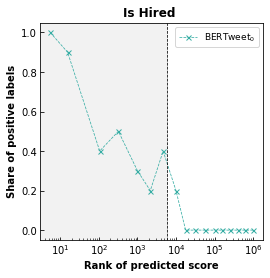

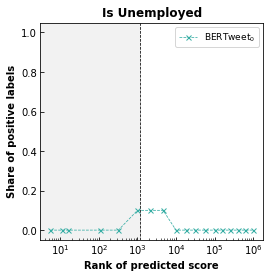

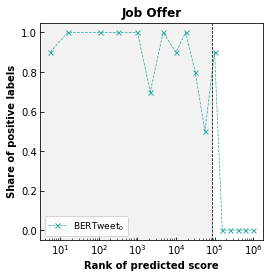

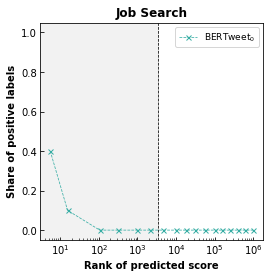

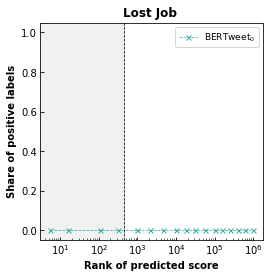

In [10]:
country_code='US'
model_folder = 'convbert_dec'
base_ranks=[int(x*N_random[country_code]) for x in base_rates_old[country_code]]
label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{model_folder}/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    df = df[['rank', 'point', 'class']]
    average_df = df.groupby(df.point).mean()
    average_df.columns = ['rank', 'share_positives']
    models=['BERT', 'GloVe']
    model='BERT'
    iteration=0
    name='iteration_'+str(iteration)+'-'+model+'-'+label
    #df[name].groupby('index_rank')[['rank','label']].mean().plot(
    average_df.plot(
    y='share_positives',
    x='rank',
    ax=ax,
    linewidth=.75,
    color=sns.color_palette("husl", len(models))[1],
    style=['--','-'][0],
    marker='x',
    markersize=5,
    label=f'BERTweet$_{str(0)}$')
    ax.axvline(label2rank[label],linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, label2rank[label], alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight')

### ConvBERT

In [3]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']

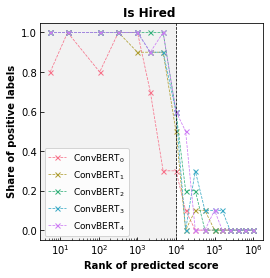

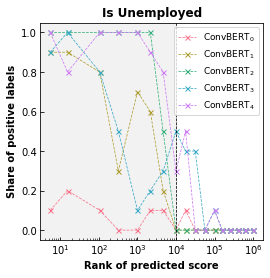

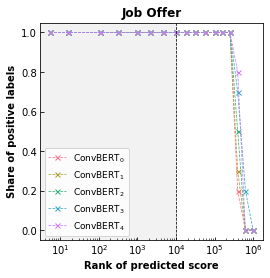

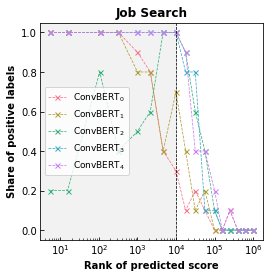

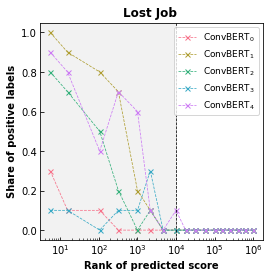

In [4]:
country_code='US'
model_folder_dict = {'iteration_0': 'iter_0-convbert-969622-evaluation',
                     'iteration_1': 'iter_1-convbert-3050798-evaluation',
                     'iteration_2': 'iter_2-convbert-3134867-evaluation',
                     'iteration_3': 'iter_3-convbert-3174249-evaluation',
                     'iteration_4': 'iter_4-convbert-3297962-evaluation'}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for iteration in range(5):
        model_folder = model_folder_dict[f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 5)[iteration],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'ConvBERT$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### ConvBERT without regexes

In [26]:
list_US_regexes = ['laid off',
 'lost my job',
 'found [.\w\s\d]*job',
 'got [.\w\s\d]*job',
 'started[.\w\s\d]*job',
 'new job',
 'unemployment',
 'anyone[.\w\s\d]*hiring',
 'wish[.\w\s\d]*job',
 'need[.\w\s\d]*job',
 'searching[.\w\s\d]*job',
 'job',
 'hiring',
 'opportunity',
 'apply',
 "(^|\W)i[ve|'ve| ][\w\s\d]* fired",
 '(^|\W)just[\w\s\d]* hired',
 "(^|\W)i[m|'m|ve|'ve| am| have]['\w\s\d]*unemployed",
 "(^|\W)i[m|'m|ve|'ve| am| have]['\w\s\d]*jobless",
 '(^|\W)looking[\w\s\d]* gig[\W]',
 '(^|\W)applying[\w\s\d]* position[\W]',
 '(^|\W)find[\w\s\d]* job[\W]',
 'i got fired',
 'just got fired',
 'i got hired',
 'unemployed',
 'jobless']

In [34]:
def discard_tweets_without_keywords(df):
    df['contains_keywords'] = df.text.str.contains('|'.join(list_US_regexes))
    return df.loc[~df['contains_keywords']]

/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *a

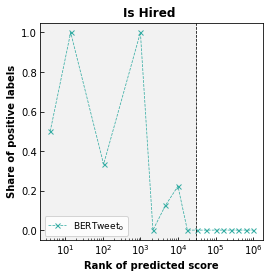

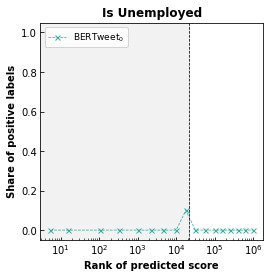

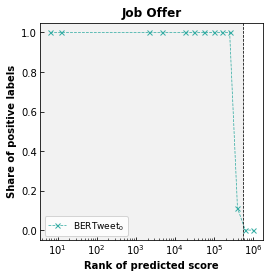

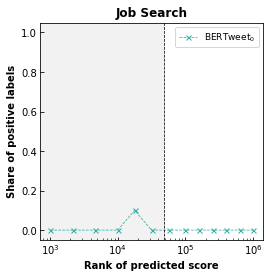

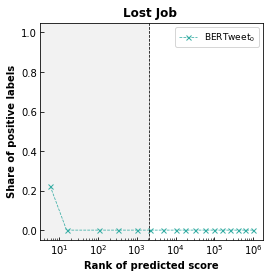

In [36]:
country_code='US'
model_folder = 'iter_0-convbert-969622-evaluation'
base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{model_folder}/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    df = discard_tweets_without_keywords(df).reset_index(drop=True)
    df = df[['rank', 'point', 'class']]
    average_df = df.groupby(df.point).mean()
    average_df.columns = ['rank', 'share_positives']
    models=['BERT', 'GloVe']
    model='BERT'
    iteration=0
    name='iteration_'+str(iteration)+'-'+model+'-'+label
    #df[name].groupby('index_rank')[['rank','label']].mean().plot(
    average_df.plot(
    y='share_positives',
    x='rank',
    ax=ax,
    linewidth=.75,
    color=sns.color_palette("husl", len(models))[1],
    style=['--','-'][0],
    marker='x',
    markersize=5,
    label=f'BERTweet$_{str(0)}$')
    ax.axvline(label2rank[label],linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, label2rank[label], alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}_without_keywords.png'),bbox_inches='tight')

### BERTweet

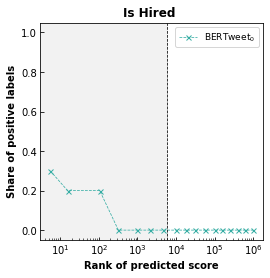

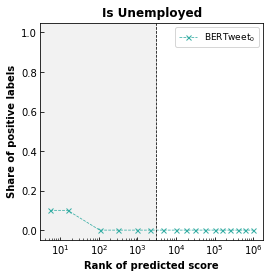

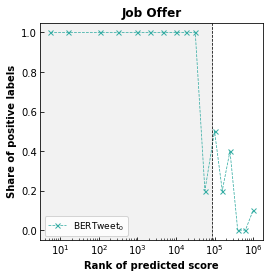

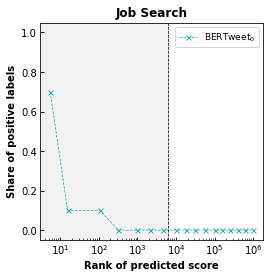

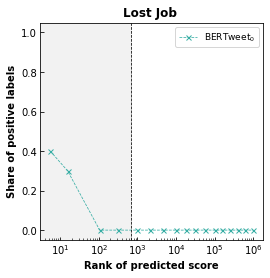

In [8]:
country_code='US'
model_folder = 'iter_0-test4-944677-evaluation'
base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{model_folder}/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    df = df[['rank', 'point', 'class']]
    average_df = df.groupby(df.point).mean()
    average_df.columns = ['rank', 'share_positives']
    models=['BERT', 'GloVe']
    model='BERT'
    iteration=0
    name='iteration_'+str(iteration)+'-'+model+'-'+label
    #df[name].groupby('index_rank')[['rank','label']].mean().plot(
    average_df.plot(
    y='share_positives',
    x='rank',
    ax=ax,
    linewidth=.75,
    color=sns.color_palette("husl", len(models))[1],
    style=['--','-'][0],
    marker='x',
    markersize=5,
    label=f'BERTweet$_{str(0)}$')
    ax.axvline(label2rank[label],linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, label2rank[label], alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight')

In [131]:
for label in labels:
    print(label)
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    print(df['text'].head(n=20))

is_hired_1mo
0     Started my new job today, &amp;i realllly like it!
1     Ayyye i just got a new job                        
2     Ayyyyy just got a new job                         
3     Thank God I got a new job!                        
4     FINALLYYYYY GOT A NEW JOB                         
5     Just got this new job                             
6     So just got a new job                             
7     Today I got a job at Chickfila                    
8     Got a new job, AGAIN ☺                            
9     Ya girl got a new job 🤩                           
10    My dad got a new job!                             
11    I got a new job! Lord I’m happy!                  
12    Finally I got a new job!                          
13    This girl just got a job :)                       
14    Yay, I got a jobbish                              
15    Started my new job today. I actually like it.     
16    YOUR GIRL JUST GOT A NEW JOB 🙌🌍😩                  
17    YAY! I got a

### Mexico

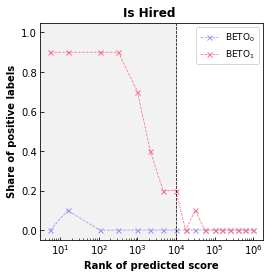

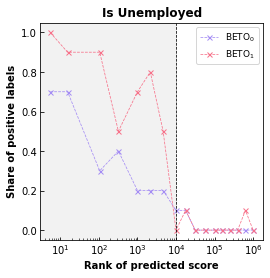

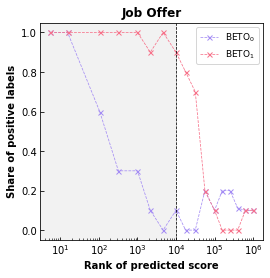

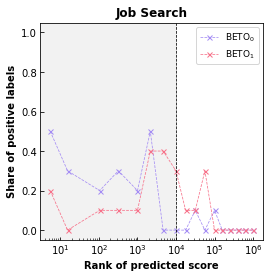

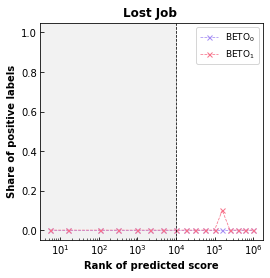

In [4]:
country_code='MX'
model_folder_dict = {'iteration_0': 'iter_0-beto-3201262-evaluation',
                     'iteration_1': 'iter_1-beto-3290711-evaluation',
                     'iteration_2': 'iter_2-convbert-3134867-evaluation',
                     'iteration_3': 'iter_3-convbert-3174249-evaluation'}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for iteration in range(2):
        model_folder = model_folder_dict[f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/MX/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 4)[iteration-1],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'BETO$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### BR

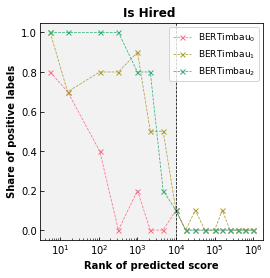

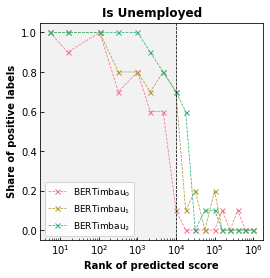

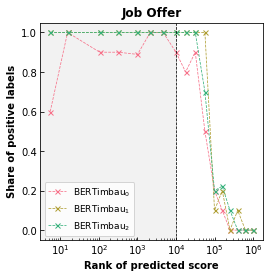

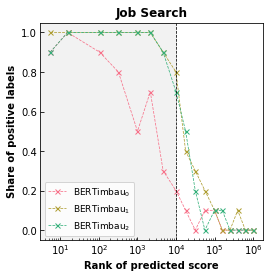

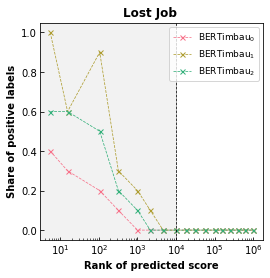

In [4]:
country_code='BR'
model_folder_dict = {'iteration_0': 'iter_0-bertimbau-2877651-evaluation',
                     'iteration_1': 'iter_1-bertimbau-3242919-evaluation',
                     'iteration_2': 'iter_2-bertimbau-3338236-evaluation',
                     'iteration_3': 'iter_3-convbert-3174249-evaluation'}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for iteration in range(3):
        model_folder = model_folder_dict[f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/BR/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 5)[iteration],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'BERTimbau$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)